In [1]:
#annotation_check.py

import cv2
import numpy as np
import pandas as pd
import os
import json
from pandas import json_normalize
from matplotlib import pyplot as plt

# annotation data 읽기
with open('train.json', 'r') as f:
    json_data = json.load(f)
df_images = json_normalize(json_data['images'])
df_annotations = json_normalize(json_data['annotations'])
data = df_images.set_index('id').join(df_annotations.set_index('image_id')).set_index('id')

# 클래스
class_dict = {0: 'General trash', 1: 'Paper', 2: 'Paper pack', 3: 'Metal', 4: 'Glass', 5: 'Plastic', 6: 'Styrofoam', 7: 'Plastic bag', 8: 'Battery', 9: 'Clothing'}
# 클래스 별 색깔 (무지개색)
color_dict = {0:(0,0,255), 1:(0,50,255), 2:(0,255,255), 3:(0,255,100), 4:(0,255,0), 5:(100,255,0), 6:(255,0,0), 7:(255,5,0), 8:(255,0,100), 9:(255,255,255)}

# 이상한 이미지 목록 있다면 불러오기
Strange_img_set = set()
if os.path.exists('./StrangeImgList.txt'):
    with open('StrangeImgList.txt', 'r') as f:
        read_data = f.readline()
        if len(read_data) >= 1: # 저장된 요소가 있다면
            read_data = read_data.split(',')
            print('exist_datas', read_data) # 기존 데이터 출력
            Strange_img_set = set(map(int, read_data))\

end_idx = 23143

# 필요에 따른 수정 부분
current_idx = 0 # 시작 인덱스
img_size = (800, 800) # 편의에 맞게 이미지 크기 조절
img_save = True # 이미지 저장 여부

if img_save:
    if not os.path.exists("./StrangeImage"):
        os.mkdir("./StrangeImage")

# txt 파일 업데이트
def save_txt(img_set):
    write_elements = ''
    if len(img_set) >= 1: # 저장할 요소가 있다면
        Strange_img_list = sorted(list(img_set)) # 정렬후, 저장
        write_elements = list(map(str, Strange_img_list))
        write_elements = ",".join(write_elements)
        print('save_datas', write_elements)
    with open('StrangeImgList.txt', 'w') as f:
        f.write(write_elements)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

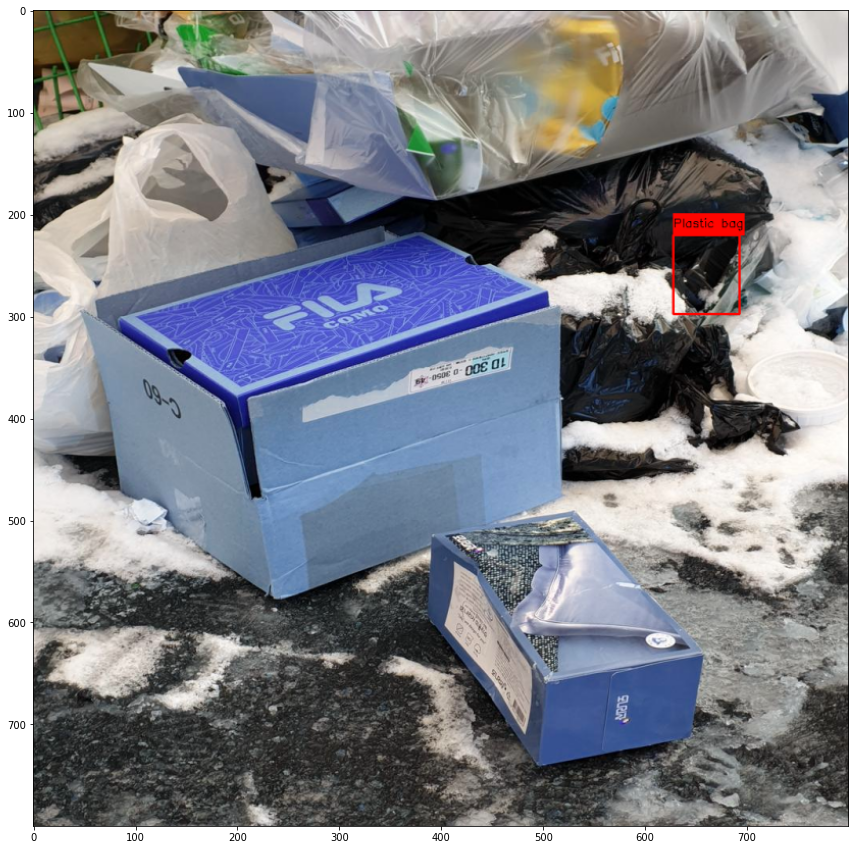

IndexError: string index out of range

In [28]:
from IPython import display
import pylab as pl
while True:
    select_data = data.iloc[current_idx]
    img = cv2.imread(select_data['file_name'])
    bbox = list(map(float, select_data['bbox']))
    category = int(select_data['category_id'])
    category_name = class_dict[category]
    color = color_dict[category]
    left, top, width, height = bbox
    # 바운딩 박스 사각형 그리기
    img = cv2.rectangle(img, (int(left), int(top)), (int(left+width), int(top+height)), color, 2)
    # 클래스 글자 넣기
    text_size, _ = cv2.getTextSize(category_name, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    text_w, text_h = text_size
    if int(top) - text_h < 1:
        cv2.rectangle(img, (int(left), int(top)), (int(left) + text_w, int(top) + 15 + text_h), color, -1)
        img = cv2.putText(img, category_name, (int(left), int(top) + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)
    else:
        cv2.rectangle(img, (int(left), int(top) - 15 - text_h), (int(left) + text_w, int(top)), color, -1)
        img = cv2.putText(img, category_name, (int(left), int(top) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)
    img = cv2.resize(img, img_size, interpolation = cv2.INTER_AREA)
    
    display.clear_output(wait=True)
    display.display(pl.gcf())
    plt.figure(figsize=(15,15))
    plt.imshow(img)
    plt.show()

    ret = (ord(input()[0]))
    
    if (ret == 102 or ret == 70) and current_idx != end_idx: # 'F' or 'f' 입력한 경우, Foward
        current_idx += 1
        print('current_idx', current_idx)
    elif (ret == 98 or ret == 66) and current_idx != 0: # 'B' or 'b' 입력한 경우, Backward
        current_idx -= 1
        print('current_idx', current_idx)
    elif ret == 83 or ret == 115: # 'S' or 's' 입력한 경우, Save
        if img_save: # 이미지 저장
            if not os.path.exists("./StrangeImage/{}.jpg".format(current_idx)):
                cv2.imwrite("./StrangeImage/{}.jpg".format(current_idx), img)
        Strange_img_set.add(current_idx)
        save_txt(Strange_img_set) # 텍스트 파일 업데이트
        print('add', current_idx)
    elif ret == 68 or ret == 100: # 'D' or 'd' 입력한 경우, Delete
        try:
            Strange_img_set.remove(current_idx)
            print('del', current_idx)
            save_txt(Strange_img_set) # 텍스트 파일 업데이트
        except:
            pass
        if img_save: # 이미지 제거
            if os.path.exists("./StrangeImage/{}.jpg".format(current_idx)):
                os.remove("./StrangeImage/{}.jpg".format(current_idx))
    elif ret == 27: # 'ESC' 입력시 종료
        break